In [193]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [194]:
data = pd.read_csv("test.csv")

In [195]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [196]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [197]:
x = data.drop("Transported", axis = 1)
y = data["Transported"]

In [198]:
y.astype("int8")

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int8

In [199]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=0)
x_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
5020,5363_01,Mars,True,F/1102/P,TRAPPIST-1e,37.0,False,0.0,0.0,0.0,0.0,0.0,Crowk Apeau
5967,6324_02,Earth,NaN,G/1025/S,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Murie Hinetthews
991,1053_01,Earth,False,F/199/S,PSO J318.5-22,27.0,False,182.0,0.0,0.0,0.0,376.0,Rald Colleruces
2894,3128_01,Earth,False,G/512/P,55 Cancri e,15.0,False,62.0,57.0,2646.0,1104.0,312.0,Heila Gordond
2228,2385_01,Mars,False,F/461/S,TRAPPIST-1e,23.0,False,1773.0,0.0,78.0,0.0,3.0,Jacats Pité
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,4655_01,Europa,True,B/154/P,55 Cancri e,32.0,False,0.0,0.0,0.0,0.0,0.0,Ainkard Seflock
7891,8423_01,Earth,False,F/1620/S,TRAPPIST-1e,22.0,False,0.0,0.0,6.0,0.0,733.0,Analdy Bartez
4859,5185_01,Mars,False,E/330/S,TRAPPIST-1e,29.0,False,523.0,0.0,21.0,4.0,811.0,Cruts Flie
3264,3499_04,Earth,False,G/574/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Allene Mccarveymon


In [200]:
age_med = x_train["Age"].median()
x_train["Age"] = x_train["Age"].fillna(age_med)
age_med


np.float64(27.0)

In [201]:
x_train["HomePlanet"] = x_train["HomePlanet"].apply(lambda x: np.random.choice(["Earth", "Europa", "Mars"], p = [0.54, 0.25, 0.21]) if isinstance(x, float) else x)

x_train["CryoSleep"] = (x_train["CryoSleep"].apply(lambda x: np.random.choice([1, 0], p = [0.36, 0.64]) if isinstance(x, float) else int(x))).astype("int8")
x_train["Destination"] = x_train["Destination"].apply(lambda x: np.random.choice(["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22"], p = [0.7, 0.21, 0.09]) if isinstance(x, float) else x)

x_train["VIP"] = x_train["VIP"].fillna(False).astype("int8")

x_train["RoomService"] = x_train["RoomService"].fillna(x_train["RoomService"].median())
x_train["FoodCourt"] = x_train["FoodCourt"].fillna(x_train["FoodCourt"].median())
x_train["ShoppingMall"] = x_train["ShoppingMall"].fillna(x_train["ShoppingMall"].median())
x_train["Spa"] = x_train["Spa"].fillna(x_train["Spa"].median())
x_train["VRDeck"] = x_train["VRDeck"].fillna(x_train["VRDeck"].median())

x_train["Cabin"] = x_train["Cabin"].str.split("/", expand=True)[2]
x_train["Cabin"] = (x_train["Cabin"] == "P").astype("int8")



C:\Users\asrya\AppData\Local\Temp\ipykernel_13976\1375064487.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train["VIP"] = x_train["VIP"].fillna(False).astype("int8")


In [202]:
x_train = x_train.drop("Name", axis = 1)

In [203]:
d = x_train["PassengerId"].str.split("_", expand=True)
d

,0,1
5020,5363,01
5967,6324,02
991,1053,01
2894,3128,01
2228,2385,01
...,...,...
4373,4655,01
7891,8423,01
4859,5185,01
3264,3499,04


In [204]:
x_train["Alone"] = (d[1] == "01").astype("int8") 
x_train["WithGroup"] = (d[1] != "01").astype("int8") 
x_train = x_train.drop("PassengerId", axis = 1)

In [205]:
x_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Alone,WithGroup
5020,Mars,1,1,TRAPPIST-1e,37.0,0,0.0,0.0,0.0,0.0,0.0,1,0
5967,Earth,1,0,55 Cancri e,44.0,0,0.0,0.0,0.0,0.0,0.0,0,1
991,Earth,0,0,PSO J318.5-22,27.0,0,182.0,0.0,0.0,0.0,376.0,1,0
2894,Earth,0,1,55 Cancri e,15.0,0,62.0,57.0,2646.0,1104.0,312.0,1,0
2228,Mars,0,0,TRAPPIST-1e,23.0,0,1773.0,0.0,78.0,0.0,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,Europa,1,1,55 Cancri e,32.0,0,0.0,0.0,0.0,0.0,0.0,1,0
7891,Earth,0,0,TRAPPIST-1e,22.0,0,0.0,0.0,6.0,0.0,733.0,1,0
4859,Mars,0,0,TRAPPIST-1e,29.0,0,523.0,0.0,21.0,4.0,811.0,1,0
3264,Earth,0,1,TRAPPIST-1e,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1


In [206]:
x_train = pd.get_dummies(x_train, columns = ["HomePlanet"], dtype = "int8")
x_train = pd.get_dummies(x_train, columns = ["Destination"], dtype = "int8")

In [207]:
x_train

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Alone,WithGroup,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
5020,1,1,37.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1
5967,1,0,44.0,0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0
991,0,0,27.0,0,182.0,0.0,0.0,0.0,376.0,1,0,1,0,0,0,1,0
2894,0,1,15.0,0,62.0,57.0,2646.0,1104.0,312.0,1,0,1,0,0,1,0,0
2228,0,0,23.0,0,1773.0,0.0,78.0,0.0,3.0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,1,1,32.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,0
7891,0,0,22.0,0,0.0,0.0,6.0,0.0,733.0,1,0,1,0,0,0,0,1
4859,0,0,29.0,0,523.0,0.0,21.0,4.0,811.0,1,0,0,0,1,0,0,1
3264,0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,1


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

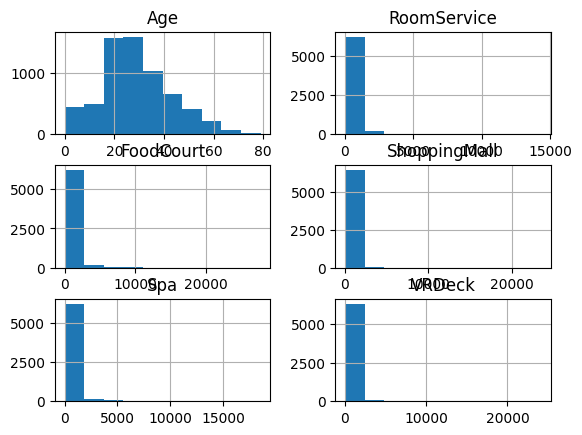

In [208]:
x_train[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].hist()

In [209]:
x_train[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = np.log(x_train[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ]] + 1)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

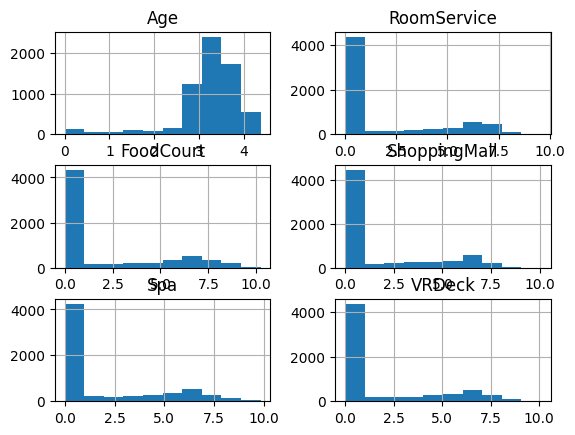

In [210]:
x_train[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].hist()

In [211]:
from sklearn.preprocessing import StandardScaler

In [212]:
x_train_sc = x_train[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
scl = StandardScaler()
x_train_sc = pd.DataFrame(scl.fit_transform(x_train_sc), columns = x_train_sc.columns, index = x_train_sc.index)
x_train[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = x_train_sc


In [229]:
x_train

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Alone,WithGroup,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
5020,1,1,0.570194,0,-0.646947,-0.648119,-0.625002,-0.660806,-0.638343,1,0,0,0,1,0,0,1
5967,1,0,0.797771,0,-0.646947,-0.648119,-0.625002,-0.660806,-0.638343,0,1,1,0,0,1,0,0
991,0,0,0.159150,0,1.250093,-0.648119,-0.625002,-0.660806,1.520347,1,0,1,0,0,0,1,0
2894,0,1,-0.594094,0,0.861780,0.740748,2.433413,1.873535,1.452648,1,0,1,0,0,1,0,0
2228,0,0,-0.048337,0,2.077265,-0.648119,1.070630,-0.660806,-0.133883,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,1,1,0.380302,0,-0.646947,-0.648119,-0.625002,-0.660806,-0.638343,1,0,0,1,0,1,0,0
7891,0,0,-0.105622,0,-0.646947,-0.648119,0.130139,-0.660806,1.762795,1,0,1,0,0,0,0,1
4859,0,0,0.252015,0,1.633182,-0.648119,0.574525,-0.078743,1.799544,1,0,0,0,1,0,0,1
3264,0,1,-4.326003,0,-0.646947,-0.648119,-0.625002,-0.660806,-0.638343,0,1,1,0,0,0,0,1


In [214]:
x_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
3601,3868_05,Earth,False,F/731/S,55 Cancri e,16.0,False,0.0,0.0,623.0,40.0,209.0,Darry Braymon
6057,6405_02,Earth,NaN,NaN,NaN,2.0,False,0.0,0.0,0.0,0.0,0.0,Feline Toddleton
2797,3021_01,Earth,False,G/476/S,TRAPPIST-1e,31.0,False,517.0,1.0,301.0,60.0,4.0,Deanny Spencervan
7110,7578_01,Earth,False,F/1572/P,55 Cancri e,14.0,False,653.0,0.0,4.0,0.0,0.0,Idace Popelacruz
8579,9158_01,Europa,True,B/298/P,55 Cancri e,30.0,True,0.0,0.0,0.0,0.0,0.0,Magnon Maglible
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,1979_01,Earth,False,F/376/S,TRAPPIST-1e,26.0,False,401.0,0.0,693.0,62.0,0.0,Delley Moodson
4160,4446_01,Europa,False,B/175/S,TRAPPIST-1e,38.0,False,2.0,114.0,771.0,3094.0,448.0,Asellan Chocaters
6477,6832_01,Mars,True,F/1421/P,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,0.0,Quid Wala
3641,3915_01,Earth,True,G/641/S,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,0.0,Leondy Mayods


In [215]:
age_med_test = x_test["Age"].median()
x_test["Age"] = x_test["Age"].fillna(age_med_test)
age_med_test

np.float64(27.0)

In [216]:
x_test["HomePlanet"] = x_test["HomePlanet"].apply(lambda x: np.random.choice(["Earth", "Europa", "Mars"], p = [0.54, 0.25, 0.21]) if isinstance(x, float) else x)

x_test["CryoSleep"] = (x_test["CryoSleep"].apply(lambda x: np.random.choice([1, 0], p = [0.36, 0.64]) if isinstance(x, float) else int(x))).astype("int8")
x_test["Destination"] = x_test["Destination"].apply(lambda x: np.random.choice(["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22"], p = [0.7, 0.21, 0.09]) if isinstance(x, float) else x)

x_test["VIP"] = x_test["VIP"].fillna(False).astype("int8")

x_test["RoomService"] = x_test["RoomService"].fillna(x_test["RoomService"].median())
x_test["FoodCourt"] = x_test["FoodCourt"].fillna(x_test["FoodCourt"].median())
x_test["ShoppingMall"] = x_test["ShoppingMall"].fillna(x_test["ShoppingMall"].median())
x_test["Spa"] = x_test["Spa"].fillna(x_test["Spa"].median())
x_test["VRDeck"] = x_test["VRDeck"].fillna(x_test["VRDeck"].median())

x_test["Cabin"] = x_test["Cabin"].str.split("/", expand=True)[2]
x_test["Cabin"] = (x_test["Cabin"] == "P").astype("int8")


C:\Users\asrya\AppData\Local\Temp\ipykernel_13976\2463638663.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test["VIP"] = x_test["VIP"].fillna(False).astype("int8")


In [217]:
x_test = x_test.drop("Name", axis = 1)

In [218]:
d = x_test["PassengerId"].str.split("_", expand=True)
d

,0,1
3601,3868,05
6057,6405,02
2797,3021,01
7110,7578,01
8579,9158,01
...,...,...
1856,1979,01
4160,4446,01
6477,6832,01
3641,3915,01


In [219]:
x_test["Alone"] = (d[1] == "01").astype("int8") 
x_test["WithGroup"] = (d[1] != "01").astype("int8") 
x_test = x_test.drop("PassengerId", axis = 1)

In [220]:
x_test = pd.get_dummies(x_test, columns = ["HomePlanet"], dtype = "int8")
x_test = pd.get_dummies(x_test, columns = ["Destination"], dtype = "int8")

In [221]:
x_test[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = np.log(x_test[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ]] + 1)

In [222]:
x_test_sc = x_test[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
x_test_sc = pd.DataFrame(scl.transform(x_test_sc), columns = x_test_sc.columns, index = x_test_sc.index)
x_test[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = x_test_sc

In [228]:
x_test

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Alone,WithGroup,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
3601,0,0,-0.512493,0,-0.646947,-0.648119,1.872646,0.682230,1.307421,0,1,1,0,0,1,0,0
6057,0,0,-2.847269,0,-0.646947,-0.648119,-0.625002,-0.660806,-0.638343,0,1,1,0,0,0,0,1
2797,0,0,0.338884,0,1.628988,-0.411029,1.591018,0.825916,-0.052683,1,0,1,0,0,0,0,1
7110,0,1,-0.680963,0,1.713884,-0.648119,-0.000435,-0.660806,-0.638343,1,0,1,0,0,1,0,0
8579,1,1,0.296150,1,-0.646947,-0.648119,-0.625002,-0.660806,-0.638343,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,0,0,0.110199,0,1.536668,-0.648119,1.913906,0.837584,-0.638343,1,0,1,0,0,0,0,1
4160,0,0,0.605157,0,-0.246886,0.974876,1.955240,2.246020,1.583947,1,0,0,1,0,0,0,1
6477,1,1,0.420484,0,-0.646947,-0.648119,-0.625002,-0.660806,-0.638343,1,0,0,0,1,0,0,1
3641,1,0,0.420484,0,-0.646947,-0.648119,-0.625002,-0.660806,-0.638343,1,0,1,0,0,0,0,1


In [223]:
y_train = y_train.astype("int8")

y_test = y_test.astype("int8")
y_test, y_train

(3601    1
 6057    1
 2797    0
 7110    0
 8579    1
        ..
 1856    0
 4160    0
 6477    1
 3641    1
 2549    1
 Name: Transported, Length: 2174, dtype: int8,
 5020    1
 5967    1
 991     0
 2894    0
 2228    0
        ..
 4373    1
 7891    0
 4859    0
 3264    0
 2732    0
 Name: Transported, Length: 6519, dtype: int8)

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [225]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
accuracy_score(y_train, model1.predict(x_train)), accuracy_score(y_test, model1.predict(x_test))

(0.7757324743058751, 0.7713891444342227)

In [226]:
model2 = GaussianNB()
model2.fit(x_train, y_train)
accuracy_score(y_train, model2.predict(x_train)), accuracy_score(y_test, model2.predict(x_test))

(0.7505752416014726, 0.7378104875804968)

In [239]:
model3 = KNeighborsClassifier(n_neighbors=30)
model3.fit(x_train, y_train)
accuracy_score(y_train, model3.predict(x_train)), accuracy_score(y_test, model3.predict(x_test))

(0.7929130234698574, 0.7838086476540939)

In [258]:
model_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=10, random_state=42)
model_bagging.fit(x_train, y_train)

accuracy_score(y_train, model_bagging.predict(x_train)), accuracy_score(y_test, model_bagging.predict(x_test))

(0.7402975916551618, 0.7309107635694572)

In [257]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(max_depth=5)
clf3 = GaussianNB()

model_voting = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('gnb', clf3)], voting='hard')
model_voting.fit(x_train, y_train)

accuracy_score(y_train, model_voting.predict(x_train)), accuracy_score(y_test, model_voting.predict(x_test))

(0.781408191440405, 0.7681692732290708)

In [276]:
estimators = [('dt', DecisionTreeClassifier(max_depth=3)),
              ('knn', KNeighborsClassifier(n_neighbors=40)),
              ('gnb', GaussianNB())]

model_stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model_stacking.fit(x_train, y_train)

accuracy_score(y_train, model_stacking.predict(x_train)), accuracy_score(y_test, model_stacking.predict(x_test))

(0.7955207853965333, 0.7893284268629255)

In [278]:
from sklearn.model_selection import GridSearchCV

In [279]:
d = {"n_estimators": [100, 200, 50, 150],
     "max_depth": [1, 2, 3],
     "min_samples_split": [2, 3, 4, 5],
     "min_samples_leaf": [1, 2, 3, 4, 5]}

gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=d, cv=3, verbose=2)
gs.fit(x_train, y_train)
gs.best_params_

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1

{'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 50}

In [280]:
model_rf = RandomForestClassifier(**gs.best_params_)
model_rf.fit(x_train, y_train)

accuracy_score(y_train, model_rf.predict(x_train)), accuracy_score(y_test, model_rf.predict(x_test))

(0.7557907654548244, 0.7470101195952162)

In [281]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor

In [295]:
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3, random_state=0), n_estimators=10, algorithm="SAMME", learning_rate=1)
adaboost_model.fit(x_train, y_train)
accuracy_score(y_train, adaboost_model.predict(x_train)), accuracy_score(y_test, adaboost_model.predict(x_test))

C:\Users\asrya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


(0.7884644884184691, 0.7865685372585096)

In [298]:
test =pd.read_csv("test.csv")

In [299]:
age_med1 = test["Age"].median()
test["Age"] = test["Age"].fillna(age_med1)
age_med1

np.float64(26.0)

In [300]:
test["HomePlanet"] = test["HomePlanet"].apply(lambda x: np.random.choice(["Earth", "Europa", "Mars"], p = [0.54, 0.25, 0.21]) if isinstance(x, float) else x)

test["CryoSleep"] = (test["CryoSleep"].apply(lambda x: np.random.choice([1, 0], p = [0.36, 0.64]) if isinstance(x, float) else int(x))).astype("int8")
test["Destination"] = test["Destination"].apply(lambda x: np.random.choice(["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22"], p = [0.7, 0.21, 0.09]) if isinstance(x, float) else x)

test["VIP"] = test["VIP"].fillna(False).astype("int8")

test["RoomService"] = test["RoomService"].fillna(test["RoomService"].median())
test["FoodCourt"] = test["FoodCourt"].fillna(test["FoodCourt"].median())
test["ShoppingMall"] = test["ShoppingMall"].fillna(test["ShoppingMall"].median())
test["Spa"] = test["Spa"].fillna(test["Spa"].median())
test["VRDeck"] = test["VRDeck"].fillna(test["VRDeck"].median())

test["Cabin"] = test["Cabin"].str.split("/", expand=True)[2]
test["Cabin"] = (test["Cabin"] == "P").astype("int8")


C:\Users\asrya\AppData\Local\Temp\ipykernel_13976\3494745957.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test["VIP"] = test["VIP"].fillna(False).astype("int8")


In [301]:
test = test.drop("Name", axis = 1)

In [302]:
d_test = test["PassengerId"].str.split("_", expand=True)
d_test

,0,1
0,0013,01
1,0018,01
2,0019,01
3,0021,01
4,0023,01
...,...,...
4272,9266,02
4273,9269,01
4274,9271,01
4275,9273,01


In [304]:
test["Alone"] = (d_test[1] == "01").astype("int8") 
test["WithGroup"] = (d_test[1] != "01").astype("int8") 
test = test.drop("PassengerId", axis = 1)

In [305]:
test = pd.get_dummies(test, columns = ["HomePlanet"], dtype = "int8")
test = pd.get_dummies(test, columns = ["Destination"], dtype = "int8")

In [307]:
test[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = np.log(test[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ]] + 1)

In [308]:
test_sc = test[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
test_sc = pd.DataFrame(scl.transform(test_sc), columns = test_sc.columns, index = test_sc.index)
test[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = test_sc

In [309]:
test

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Alone,WithGroup,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,0,0.159150,0,-0.646947,-0.648119,-0.625002,-0.660806,-0.638343,1,0,1,0,0,0,0,1
1,0,0,-0.293742,0,-0.646947,0.139476,-0.625002,2.212880,-0.638343,1,0,1,0,0,0,0,1
2,1,0,0.338884,0,-0.646947,-0.648119,-0.625002,-0.660806,-0.638343,1,0,0,1,0,1,0,0
3,0,0,0.605157,0,-0.646947,2.362870,-0.625002,1.221254,1.680850,1,0,0,1,0,0,0,1
4,0,0,-0.228070,0,0.226249,-0.648119,1.880038,-0.660806,-0.638343,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,0,0.459502,0,-0.646947,-0.648119,-0.625002,-0.660806,-0.638343,0,1,1,0,0,0,0,1
4273,0,0,0.736579,0,-0.646947,1.658271,0.496652,0.206407,1.172645,1,0,1,0,0,0,0,1
4274,1,1,0.110199,0,-0.646947,-0.648119,-0.625002,-0.660806,-0.638343,1,0,0,0,1,1,0,0
4275,0,1,0.110199,0,-0.646947,2.051990,-0.625002,-0.660806,1.640157,1,0,0,1,0,0,0,1


In [312]:
 model_stacking.predict(test)

array([1, 0, 1, ..., 1, 1, 1], shape=(4277,), dtype=int8)

In [387]:
predict_df = pd.DataFrame

test1 = pd.read_csv("test.csv")
test1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [388]:
test1 = test1.drop("HomePlanet",  axis  = 1)
test1 = test1.drop("CryoSleep",  axis  = 1)
test1 = test1.drop("Cabin",  axis  = 1)
test1 = test1.drop("Destination",  axis  = 1)
test1 = test1.drop("Age",  axis  = 1)
test1 = test1.drop("VIP",  axis  = 1)
test1 = test1.drop("RoomService",  axis  = 1)
test1 = test1.drop("FoodCourt",  axis  = 1)
test1 = test1.drop("ShoppingMall",  axis  = 1)
test1 = test1.drop("Spa",  axis  = 1)
test1 = test1.drop("VRDeck",  axis  = 1)
test1 = test1.drop("Name",  axis  = 1)



In [389]:
test1["Transported"] = model_stacking.predict(test).astype("bool")

In [390]:
test1.to_csv("preds.csv")